In [1]:
%matplotlib inline
# %matplotlib notebook

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import multiprocessing

from ipywidgets import widgets

import skimage
from skimage import io
from skimage.viewer import ImageViewer


matplotlib.rcParams['toolbar'] = 'None'



/home/eder/miniconda3/envs/cg/lib/python3.7/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [2]:
img = io.imread(f'images/cat03.jpg')
# img = skimage.transform.rescale(img, 1) # Convert image color range to [0, 1[
print(img.shape)
img[:2]

(3396, 2261, 3)


array([[[56, 51, 47],
        [62, 57, 53],
        [65, 60, 56],
        ...,
        [78, 74, 65],
        [78, 74, 65],
        [78, 74, 65]],

       [[59, 54, 50],
        [61, 56, 52],
        [60, 55, 51],
        ...,
        [78, 74, 65],
        [78, 74, 65],
        [77, 73, 64]]], dtype=uint8)

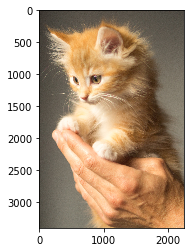

In [3]:
# viewer = ImageViewer(img)
# viewer.show()
plt.imshow(img)

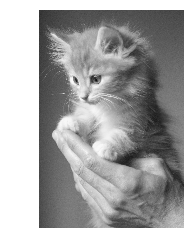

In [4]:
gray_image = img.copy()

# Normalize image, converting it to grayscale and it's scale to [0, 1[
y_, x_, _ = gray_image.shape
for x in range(x_):
    for y in range(y_):
        r, g, b = gray_image[y, x]
        gray = (int(r) + int(g) + int(b)) / int(3)
        gray_image[y, x] = (gray, gray, gray)

    
gray_image = gray_image / 255.0

f, axarr = plt.subplots(1,1)
axarr.axis('off')
axarr.imshow(gray_image)

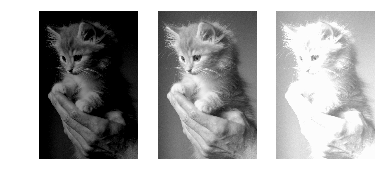

In [5]:
def shift_brightness(img, c):
    y_, x_, _ = img.shape
    for x in range(x_):
        for y in range(y_):
            img[y, x] += c
            if img[y, x][0] >= 1: img[y, x] = 0.99       
            if img[y, x][0] <= 0: img[y, x] = 0
    return img

def _apply(c):
    return shift_brightness(gray_image.copy(), c)

with multiprocessing.Pool(processes=5) as p:
    dark, bright = p.map(_apply, [-0.4, 0.4])

f, axarr = plt.subplots(1,3)
for ax in axarr: ax.axis('off')

axarr[0].imshow(dark)
axarr[1].imshow(gray_image)
axarr[2].imshow(bright)

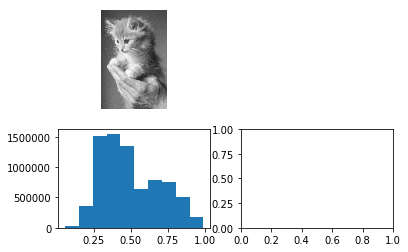

interactive(children=(FloatSlider(value=0.0, description='c', max=1.0, min=-1.0, step=0.2), Output()), _dom_cl…

In [6]:
def get_histogram(image):
    #Image is gray, so take only red pixels
    image = image[:, :, 0]
    # Transform image to 1 dimension array
    return [pix for col in image for pix in col]


fig, axarr = plt.subplots(2,2)
for ax in axarr[0]: ax.axis('off')

axarr[0][0].imshow(gray_image)
axarr[1][0].hist(get_histogram(gray_image))


def handle(c):
    axarr[0][1].text(0, 0, 'loading')
    fig.canvas.draw()
    mut_img = shift_brightness(gray_image.copy(), c)
    axarr[0][1].clear()
    axarr[1][1].clear()
    for ax in axarr[0]: ax.axis('off')
    axarr[0][1].imshow(mut_img)
    axarr[1][1].hist(get_histogram(mut_img))
    fig.canvas.draw()


mut_img = widgets.interact(handle, c=(-1, 1, 0.2))